# Inter-clusters Analysis

## Voice Usage

In [86]:
voice_usage = user_profile[["Cluster","VOICE_Categorical"]].value_counts().sort_index()
voice_usage

Cluster  VOICE_Categorical
0        HIGH                   66
         LOW                  1170
         MEDIUM                485
1        HIGH                   16
         LOW                   324
         MEDIUM                221
2        HIGH                   37
         LOW                   662
         MEDIUM                326
dtype: int64

<AxesSubplot:ylabel='None'>

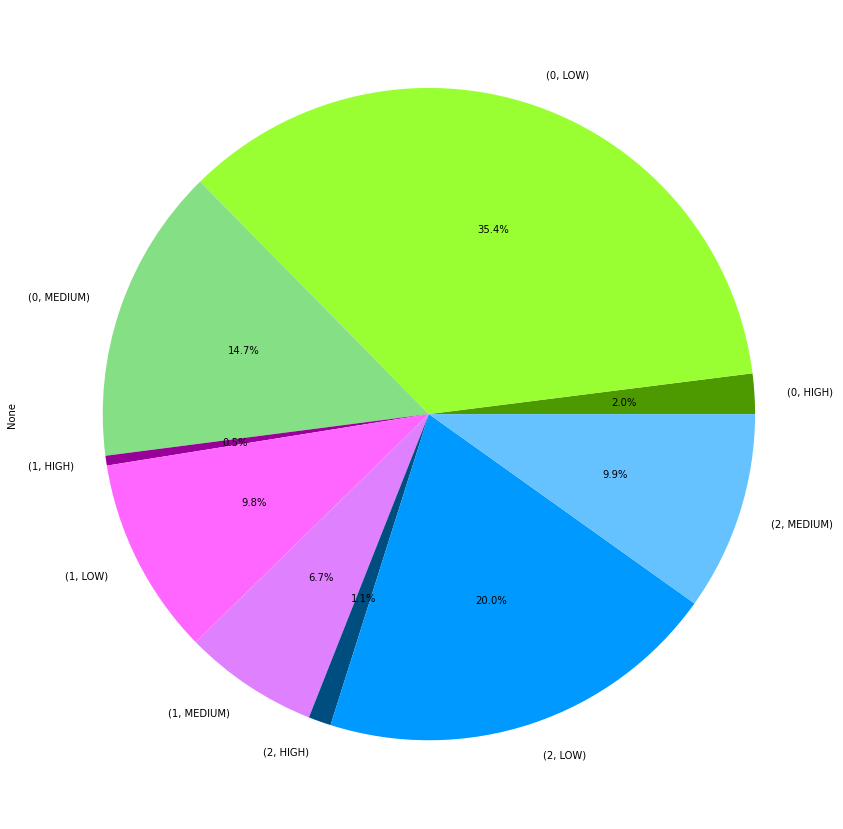

In [87]:
voice_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#4d9900","#99ff33","#85e085","#990099","#ff66ff","#df80ff","#004d80","#0099ff","#66c2ff"])

<AxesSubplot:xlabel='Cluster,VOICE_Categorical'>

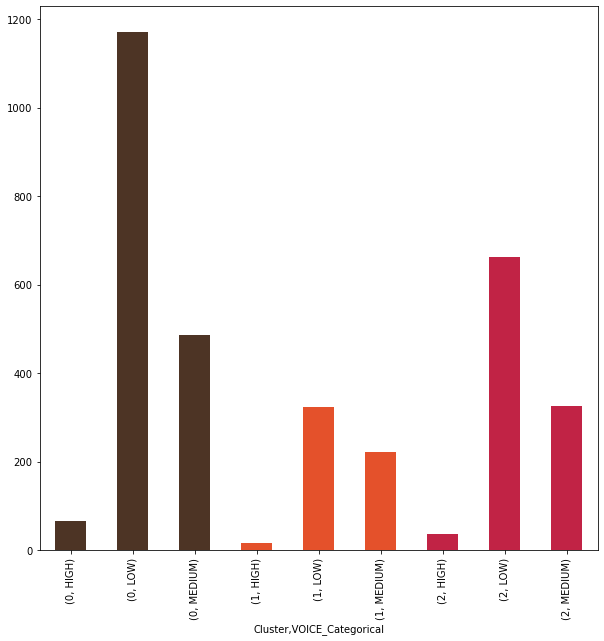

In [126]:
colors = ['#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345"]
voice_usage.plot(stacked=True, kind="bar", figsize=(10,10),color=colors)

<AxesSubplot:xlabel='Cluster,VOICE_Categorical'>

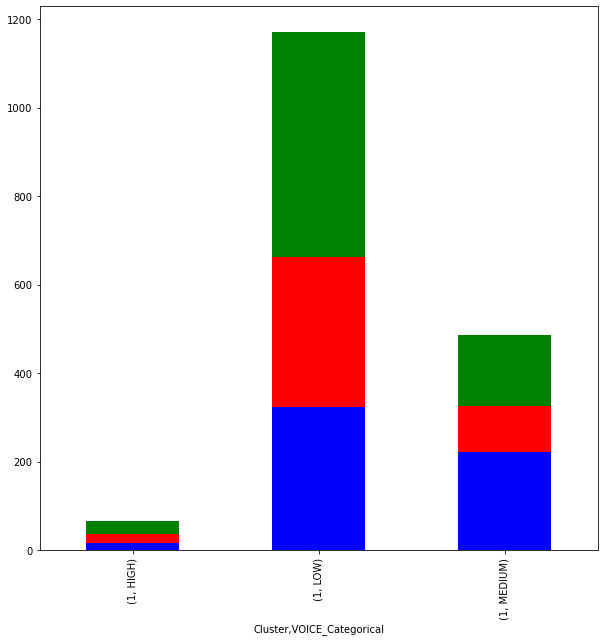

In [89]:
ax = voice_usage[:3].plot(stacked=True, kind="bar", figsize=(10,10), color="green")
voice_usage[6:9].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="red")
voice_usage[3:6].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="blue")
# Green - 0
# Red - 1
# Blue - 2

## IDD Usage

In [90]:
idd_usage = user_profile[["Cluster","IDD_Overall_Categorical"]].value_counts().sort_index()
idd_usage

Cluster  IDD_Overall_Categorical
0        HIGH                         37
         LOW                         592
         MEDIUM                       38
         NO                         1054
1        HIGH                         15
         LOW                         204
         MEDIUM                        9
         NO                          333
2        HIGH                         13
         LOW                         352
         MEDIUM                       35
         NO                          625
dtype: int64

<AxesSubplot:ylabel='None'>

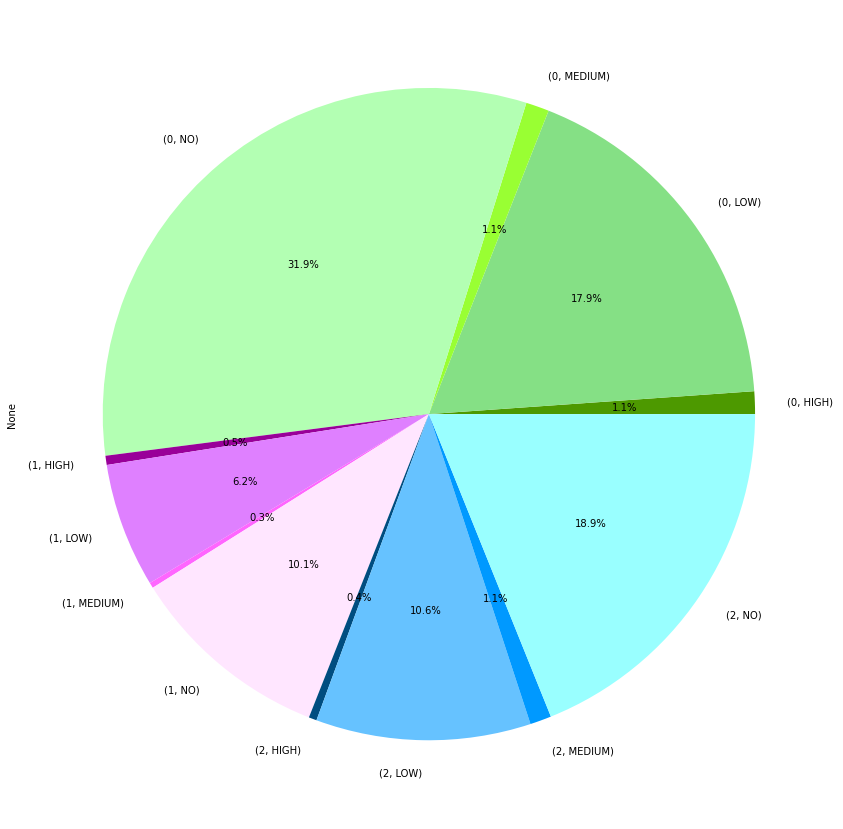

In [91]:
idd_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#4d9900","#85e085","#99ff33","#b3ffb3","#990099","#df80ff","#ff66ff","#ffe6ff","#004d80","#66c2ff","#0099ff","#99ffff"])

<AxesSubplot:xlabel='Cluster,IDD_Overall_Categorical'>

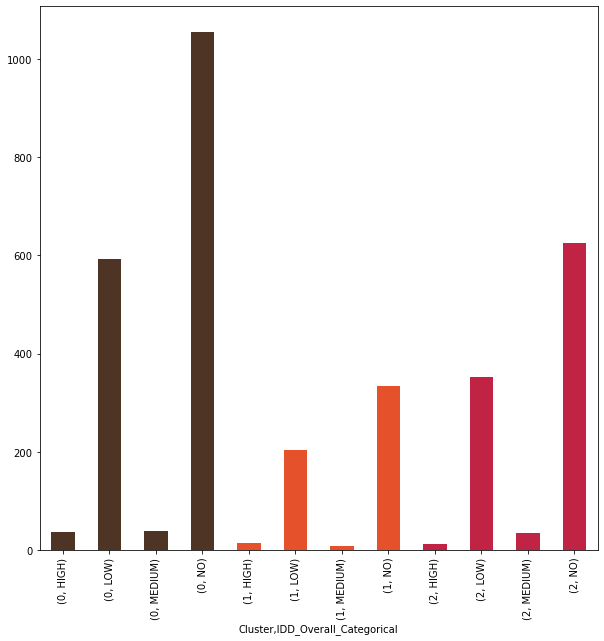

In [125]:
colors = ['#4D3425','#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345","#C12345"]
idd_usage.plot(stacked=True, kind="bar", figsize=(10,10),color=colors)

<AxesSubplot:xlabel='Cluster,IDD_Overall_Categorical'>

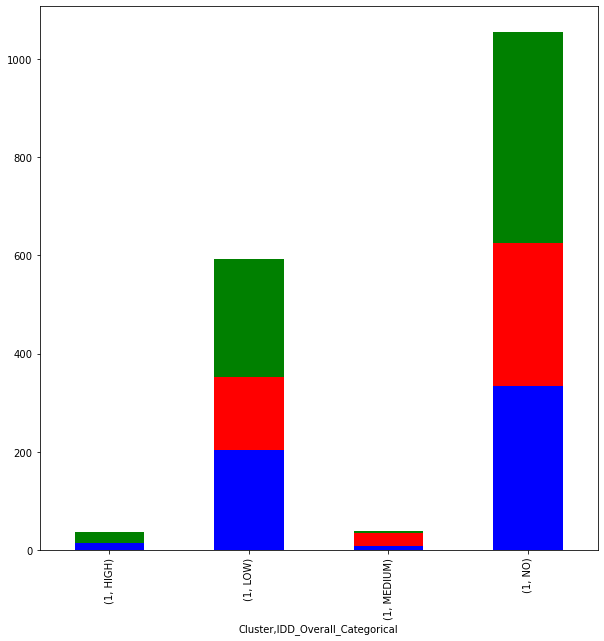

In [93]:
ax = idd_usage[:4].plot(stacked=True, kind="bar", figsize=(10,10), color="green")
idd_usage[8:12].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="red")
idd_usage[4:8].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="blue")
#  0 - Blue , 1 - Red , 2- Green

## BraodBand Usage analysis

In [95]:
bb_usage = user_profile[["Cluster","BB_Categorical"]].value_counts().sort_index()
bb_usage

Cluster  BB_Categorical
0        LOW                 55
         MEDIUM               3
         NO                1663
1        HIGH               101
         LOW                257
         MEDIUM             203
2        HIGH                95
         LOW                380
         MEDIUM             146
         NO                 404
dtype: int64

<AxesSubplot:ylabel='None'>

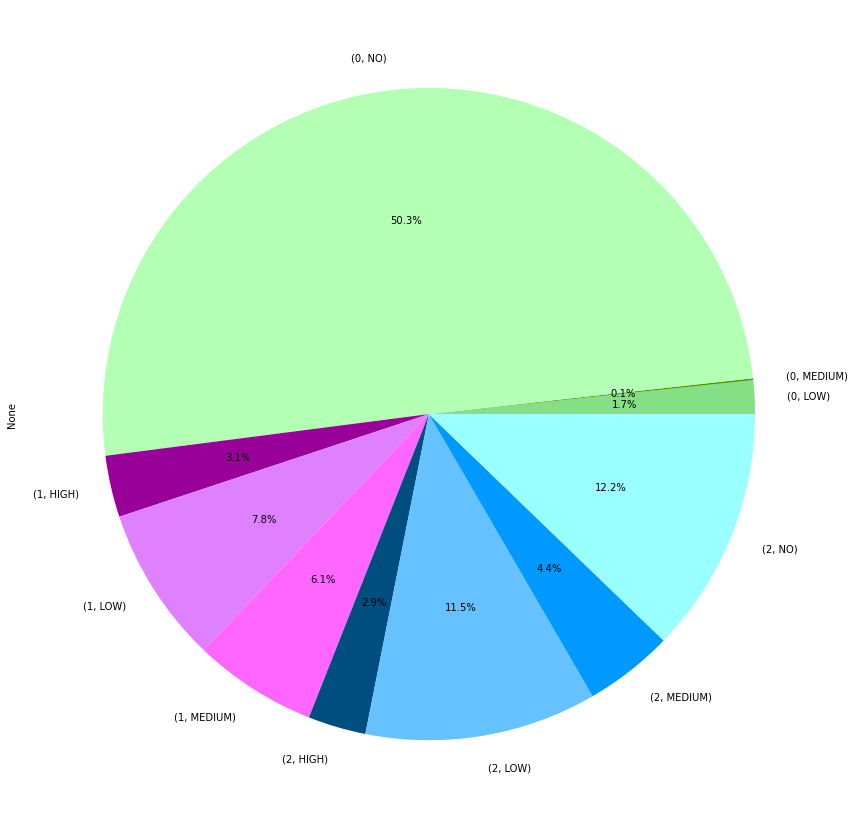

In [96]:
bb_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#85e085","#4d9900","#b3ffb3","#990099","#df80ff","#ff66ff","#004d80","#66c2ff","#0099ff","#99ffff"])

<AxesSubplot:xlabel='Cluster,BB_Categorical'>

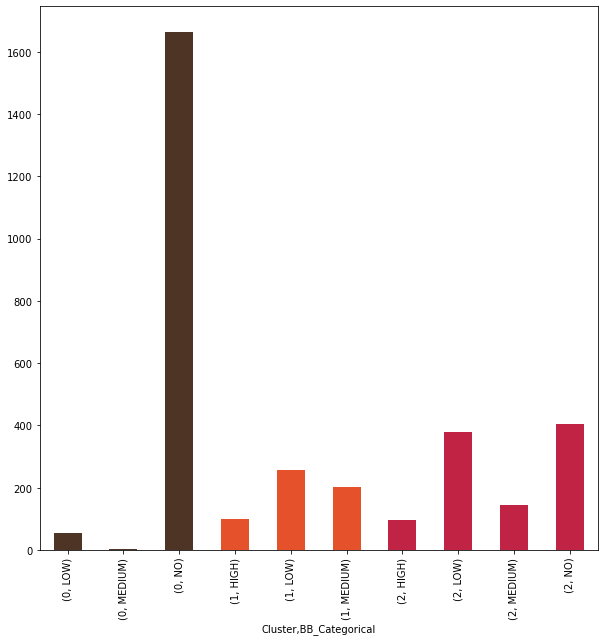

In [123]:
colors = ['#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345","#C12345"]
bb_usage.plot(stacked=True, kind="bar", figsize=(10,10), color=colors)

### Identifying factors for recommending Broadband for Cluster 0

In [98]:
# Cluster 2 --> 61% Broadband Users, first I'll Identify thier features and then compare with cluster 0

In [99]:
scaler = MinMaxScaler()
cluster_0["Location_Identifier"] = cluster_0["Location_Identifier"].astype("category")
cluster_0["Location_Identifier_Scaled"] = cluster_0["Location_Identifier"].cat.codes
cluster_0["Location_Identifier_Scaled"] = scaler.fit_transform(cluster_0["Location_Identifier_Scaled"].values.reshape(-1,1))

<ipython-input-99-4c4db900b709>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-4c4db900b709>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-4c4db900b709>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

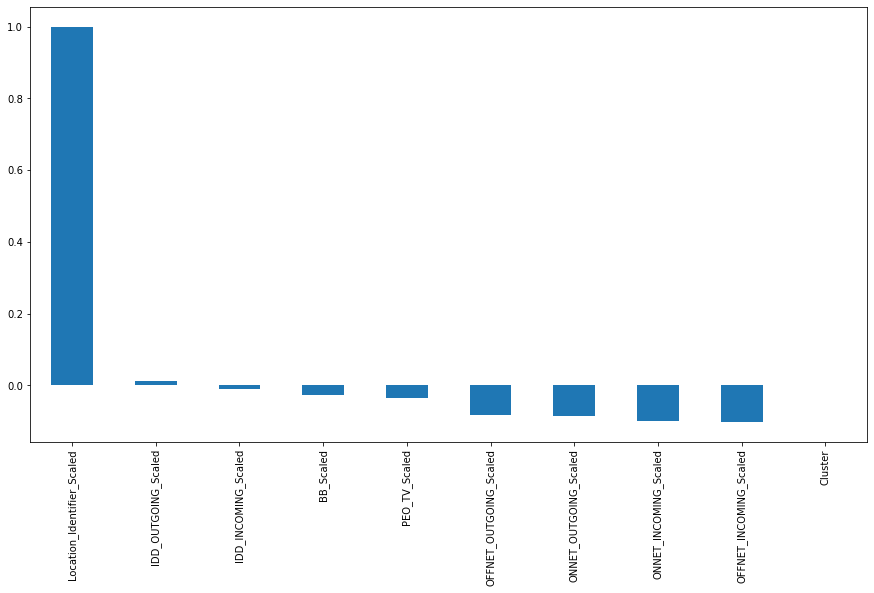

In [119]:
plt.figure(figsize=(15,8))
cluster_0.corr()['Location_Identifier_Scaled'].sort_values(ascending = False).plot(kind='bar')

In [121]:
cluster_0_loc = cluster_0.groupby('Location_Identifier').count()["event_source.hash"]

#### Feasible locations to offer BroadBand Internet compared to Double Play Users

In [101]:
cluster_2_bb_loc = cluster_2_bb.groupby('Location_Identifier').count()["event_source.hash"]

<AxesSubplot:xlabel='Location_Identifier'>

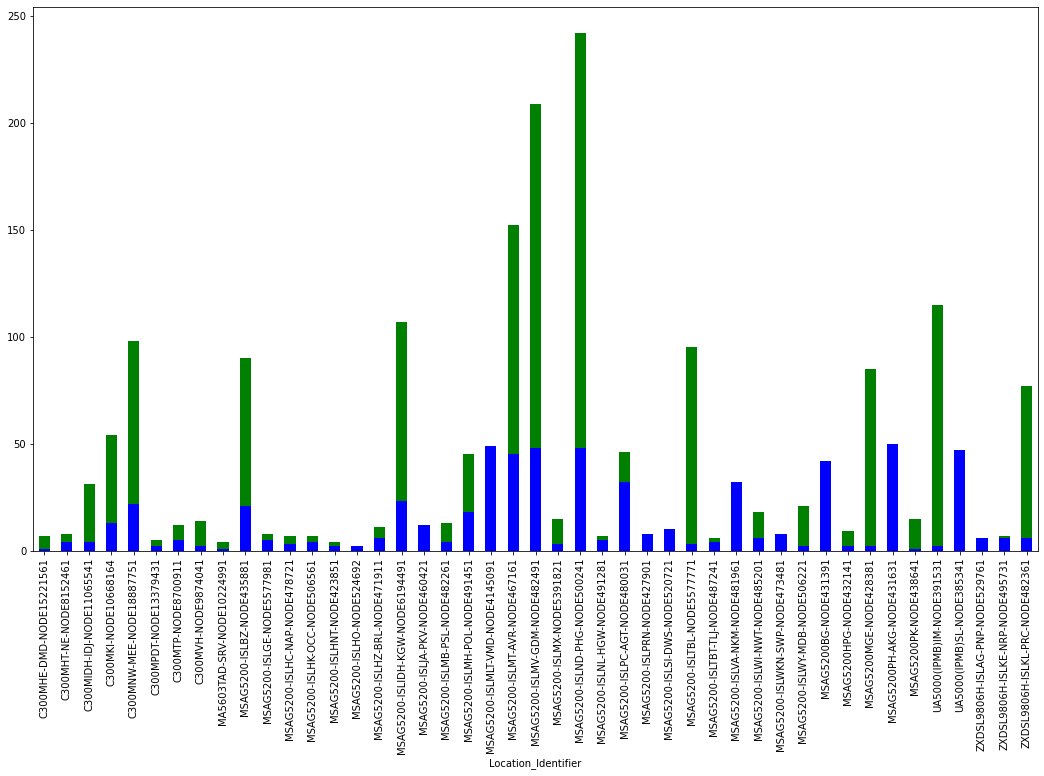

In [102]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_2_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
# green cluser 0
# blue Cluster 1 BB

In [103]:
loc_precentage=(cluster_2_bb_loc/cluster_0_loc)*100

In [104]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
MSAG5200-ISLGE-NODE5577981          62.500000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLJA-PKV-NODE460421      200.000000
MSAG5200-ISLMLT-VMD-NODE4145091    408.333333
MSAG5200-ISLNL-HGW-NODE491281       71.428571
MSAG5200-ISLPC-AGT-NODE480031       69.565217
MSAG5200-ISLPRN-NODE427901         400.000000
MSAG5200-ISLTBT-TLJ-NODE487241      80.000000
MSAG5200-ISLVA-NKM-NODE481961      177.777778
MSAG5200-ISLWI-NWT-NODE485201      100.000000
UA5000(IPMB)SL-NODE385341           61.038961
ZXDSL9806H-ISLAG-PNP-NODE529761     66.666667
ZXDSL9806H-ISLKE-NRP-NODE495731    120.000000
Name: event_source.hash, dtype: float64

In [105]:
# Relationship with Socio economic Factors

## PeoTV Usage analysis

In [106]:
peo_usage = user_profile[["Cluster","PEO_TV_Categorical"]].value_counts().sort_index()
peo_usage

Cluster  PEO_TV_Categorical
0        LOW                     54
         MEDIUM                   4
         NO                    1663
1        HIGH                   385
         LOW                     14
         MEDIUM                 162
2        HIGH                   211
         LOW                     58
         MEDIUM                 135
         NO                     621
dtype: int64

<AxesSubplot:ylabel='None'>

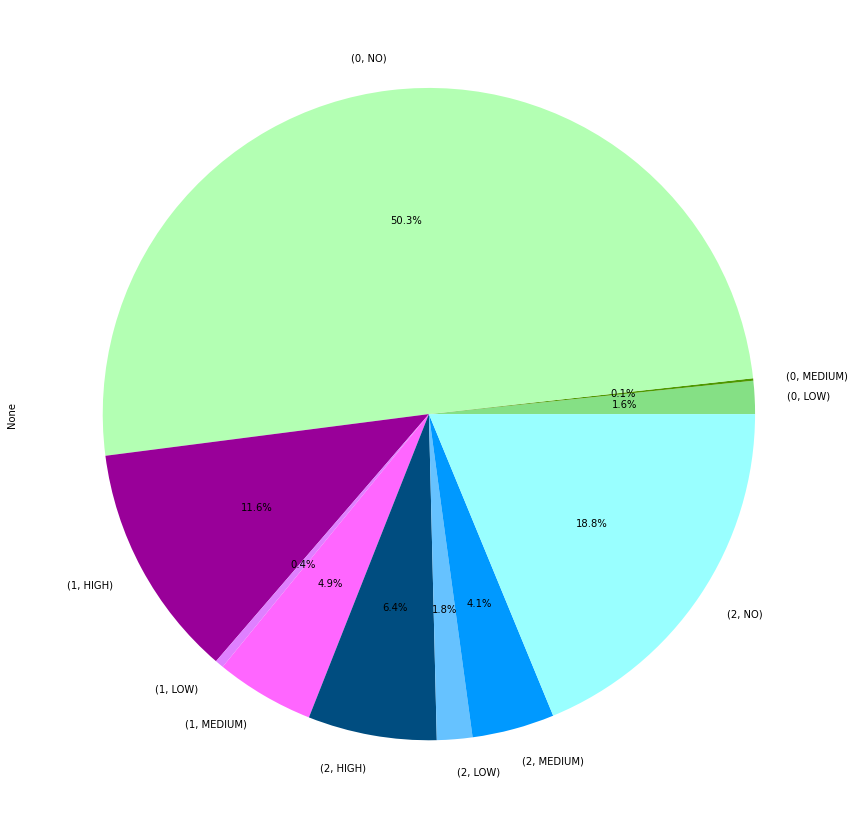

In [107]:
peo_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#85e085","#4d9900","#b3ffb3","#990099","#df80ff","#ff66ff","#004d80","#66c2ff","#0099ff","#99ffff"])

<AxesSubplot:xlabel='Cluster,PEO_TV_Categorical'>

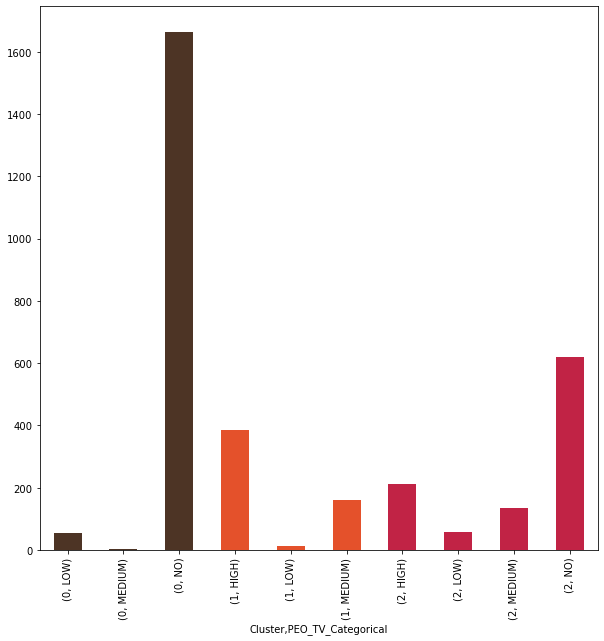

In [134]:
colors = ['#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345","#C12345"]
peo_usage.plot(stacked=True, kind="bar", figsize=(10,10),color=colors)

### Identifying factors for recommending PeoTV for Cluster 0

In [109]:
# Cluster 2 --> 39% PeoTV Users, first I'll Identify thier features and then compare with cluster 0

#### Feasible locations to offer PeoTV compared to Double Play Users

In [110]:
cluster_2_peo_loc = cluster_2_peo.groupby('Location_Identifier').count()["event_source.hash"]

<AxesSubplot:xlabel='Location_Identifier'>

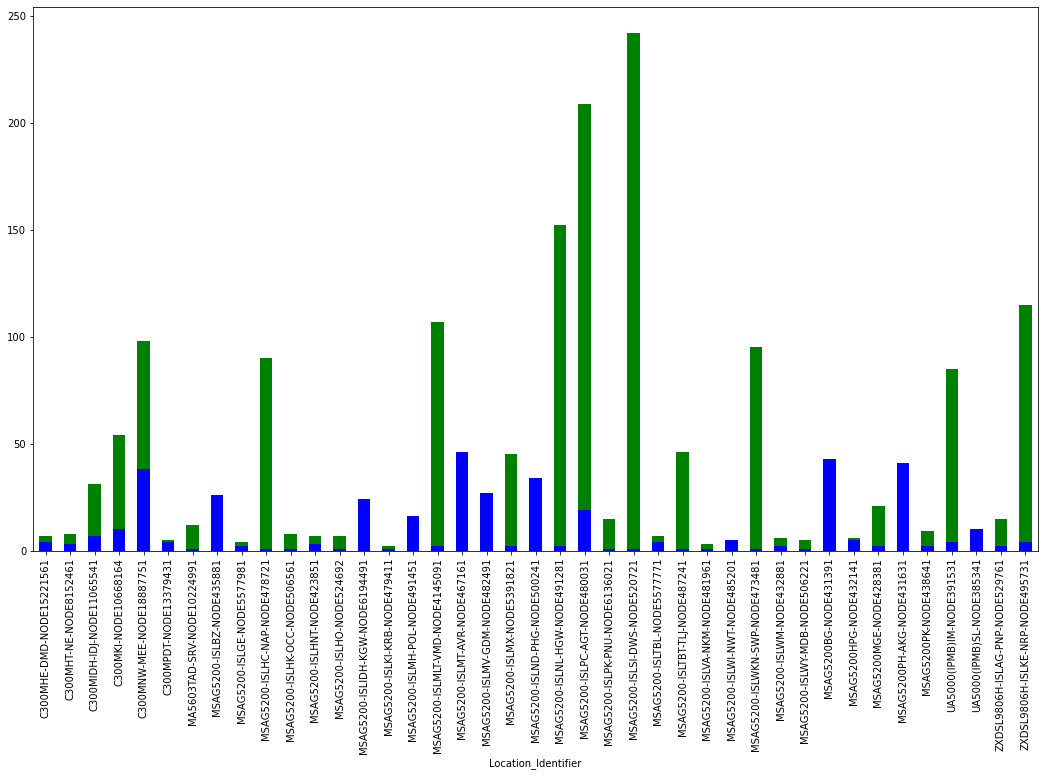

In [111]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_2_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
# green cluser 0
# blue Cluster 1 BB

In [112]:
loc_precentage=(cluster_2_peo_loc/cluster_0_loc)*100

In [113]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MPDT-NODE13379431               80.000000
MSAG5200-ISLHNT-NODE423851          75.000000
MSAG5200-ISLTBL-NODE5577771         66.666667
MSAG5200-ISLWI-NWT-NODE485201       83.333333
MSAG5200-ISLWM-NODE432881           66.666667
MSAG5200HPG-NODE432141             100.000000
ZXDSL9806H-ISLKE-NRP-NODE495731     80.000000
Name: event_source.hash, dtype: float64

### Feasible locations to offer peoTV and Broadband compared to Triple Play Users

In [114]:
cluster_1_peo_loc = cluster_1.groupby('Location_Identifier').count()["event_source.hash"]

<AxesSubplot:xlabel='Location_Identifier'>

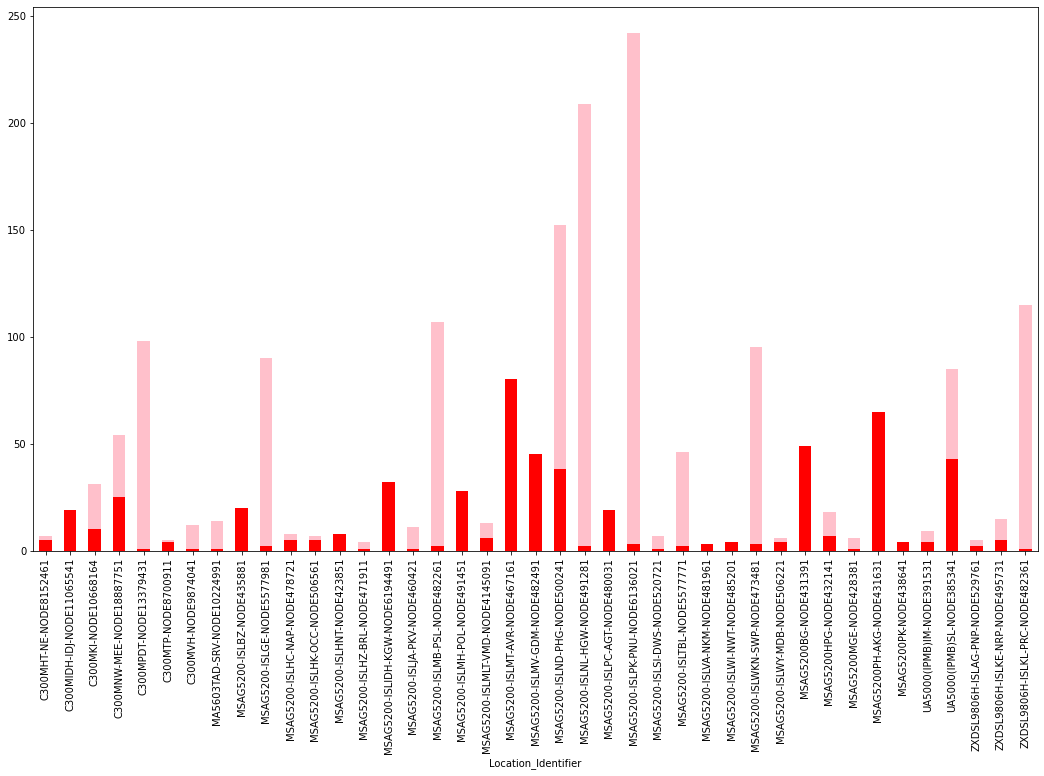

In [115]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_1_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
# pink cluser 0
# red Cluster 1 PeoTV

In [116]:
loc_precentage=(cluster_1_peo_loc/cluster_0_loc)*100

In [117]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461              62.500000
C300MIDH-IDJ-NODE11065541           61.290323
MSAG5200-ISLHC-NAP-NODE478721       71.428571
MSAG5200-ISLHK-OCC-NODE506561       71.428571
MSAG5200-ISLHNT-NODE423851         200.000000
MSAG5200-ISLMH-POL-NODE491451       62.222222
MSAG5200-ISLPK-PNU-NODE6136021     100.000000
MSAG5200-ISLWI-NWT-NODE485201       66.666667
MSAG5200HPG-NODE432141             140.000000
MSAG5200PK-NODE438641               80.000000
ZXDSL9806H-ISLKE-NRP-NODE495731    100.000000
Name: event_source.hash, dtype: float64

In [ ]:
t(kind="bar", figsize=(10,10), ax=ax, 
                                    color=["blue","blue","orange","orange","green","green", "pink","pink"])# Inter-clusters Analysis

## Voice Usage

voice_usage = user_profile[["Cluster","VOICE_Categorical"]].value_counts().sort_index()
voice_usage

voice_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#4d9900","#99ff33","#85e085","#990099","#ff66ff","#df80ff","#004d80","#0099ff","#66c2ff"])

colors = ['#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345"]
voice_usage.plot(stacked=True, kind="bar", figsize=(10,10),color=colors)

ax = voice_usage[:3].plot(stacked=True, kind="bar", figsize=(10,10), color="green")
voice_usage[6:9].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="red")
voice_usage[3:6].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="blue")
# Green - 0
# Red - 1
# Blue - 2

## IDD Usage

idd_usage = user_profile[["Cluster","IDD_Overall_Categorical"]].value_counts().sort_index()
idd_usage

idd_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#4d9900","#85e085","#99ff33","#b3ffb3","#990099","#df80ff","#ff66ff","#ffe6ff","#004d80","#66c2ff","#0099ff","#99ffff"])

colors = ['#4D3425','#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345","#C12345"]
idd_usage.plot(stacked=True, kind="bar", figsize=(10,10),color=colors)

ax = idd_usage[:4].plot(stacked=True, kind="bar", figsize=(10,10), color="green")
idd_usage[8:12].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="red")
idd_usage[4:8].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="blue")
#  0 - Blue , 1 - Red , 2- Green

## BraodBand Usage analysis

bb_usage = user_profile[["Cluster","BB_Categorical"]].value_counts().sort_index()
bb_usage

bb_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#85e085","#4d9900","#b3ffb3","#990099","#df80ff","#ff66ff","#004d80","#66c2ff","#0099ff","#99ffff"])

colors = ['#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345","#C12345"]
bb_usage.plot(stacked=True, kind="bar", figsize=(10,10), color=colors)

### Identifying factors for recommending Broadband for Cluster 0

# Cluster 2 --> 61% Broadband Users, first I'll Identify thier features and then compare with cluster 0

scaler = MinMaxScaler()
cluster_0["Location_Identifier"] = cluster_0["Location_Identifier"].astype("category")
cluster_0["Location_Identifier_Scaled"] = cluster_0["Location_Identifier"].cat.codes
cluster_0["Location_Identifier_Scaled"] = scaler.fit_transform(cluster_0["Location_Identifier_Scaled"].values.reshape(-1,1))

plt.figure(figsize=(15,8))
cluster_0.corr()['Location_Identifier_Scaled'].sort_values(ascending = False).plot(kind='bar')

cluster_0_loc = cluster_0.groupby('Location_Identifier').count()["event_source.hash"]

#### Feasible locations to offer BroadBand Internet compared to Double Play Users

cluster_2_bb_loc = cluster_2_bb.groupby('Location_Identifier').count()["event_source.hash"]

ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_2_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
# green cluser 0
# blue Cluster 1 BB

loc_precentage=(cluster_2_bb_loc/cluster_0_loc)*100

loc_precentage[(loc_precentage > 60)]

# Relationship with Socio economic Factors



## PeoTV Usage analysis

peo_usage = user_profile[["Cluster","PEO_TV_Categorical"]].value_counts().sort_index()
peo_usage

peo_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#85e085","#4d9900","#b3ffb3","#990099","#df80ff","#ff66ff","#004d80","#66c2ff","#0099ff","#99ffff"])

colors = ['#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345","#C12345"]
peo_usage.plot(stacked=True, kind="bar", figsize=(10,10),color=colors)

### Identifying factors for recommending PeoTV for Cluster 0

# Cluster 2 --> 39% PeoTV Users, first I'll Identify thier features and then compare with cluster 0

#### Feasible locations to offer PeoTV compared to Double Play Users

cluster_2_peo_loc = cluster_2_peo.groupby('Location_Identifier').count()["event_source.hash"]

ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_2_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
# green cluser 0
# blue Cluster 1 BB

loc_precentage=(cluster_2_peo_loc/cluster_0_loc)*100

loc_precentage[(loc_precentage > 60)]

### Feasible locations to offer peoTV and Broadband compared to Triple Play Users

cluster_1_peo_loc = cluster_1.groupby('Location_Identifier').count()["event_source.hash"]

ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_1_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
# pink cluser 0
# red Cluster 1 PeoTV

loc_precentage=(cluster_1_peo_loc/cluster_0_loc)*100

loc_precentage[(loc_precentage > 60)]